In [1]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import h5py
import os
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/home/chenxupeng/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
styles = ["white","dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']
sns.set_context(contexts[1])
sns.set_style(styles[0])
rnanames = ['miRNA', 'piRNA', 'Y_RNA', 'snRNA','srpRNA','tRNA',
            'lncRNA','mRNA','other_genomic_region','non_human',
            ]
tableau20 = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)])

In [9]:
file1 = '/BioII/lulab_b/caojingyi/project/sr2017/stat/type_summary.per'
file2 = '/BioII/lulab_b/caojingyi/project/sr2017/stat/crc_len_summary.final.per'

In [16]:
rna_ratio = pd.read_table(file1)
rna_ratio.head()

,miRNA,piRNA,Y_RNA,snRNA,snoRNA,srpRNA,tRNA,lncRNA,mRNA,tucp,hg38other,nonHuman_N
Sample_1S1,0.230273,0.331604,0.016360,0.007073,0.000298,0.000806,0.035032,0.003882,0.007302,0.012638,0.233108,0.121623
Sample_1S10,0.267002,0.320761,0.010116,0.003316,0.000203,0.000536,0.037869,0.003044,0.005817,0.009621,0.166514,0.175200
Sample_1S11,0.250690,0.306307,0.011824,0.004003,0.000225,0.000612,0.034920,0.003556,0.006975,0.011333,0.189603,0.179952
Sample_1S12,0.265619,0.300422,0.013549,0.005439,0.000352,0.000842,0.044244,0.003327,0.008459,0.012719,0.244968,0.100062
Sample_1S13,0.241204,0.428304,0.009041,0.004130,0.000262,0.000501,0.047176,0.002561,0.004107,0.009265,0.148161,0.105289


In [18]:
rna_ratio.mean()

miRNA         0.249729
piRNA         0.353820
Y_RNA         0.014364
snRNA         0.004876
snoRNA        0.000294
srpRNA        0.000628
tRNA          0.041115
lncRNA        0.003300
mRNA          0.005953
tucp          0.010612
hg38other     0.184530
nonHuman_N    0.130781
dtype: float64

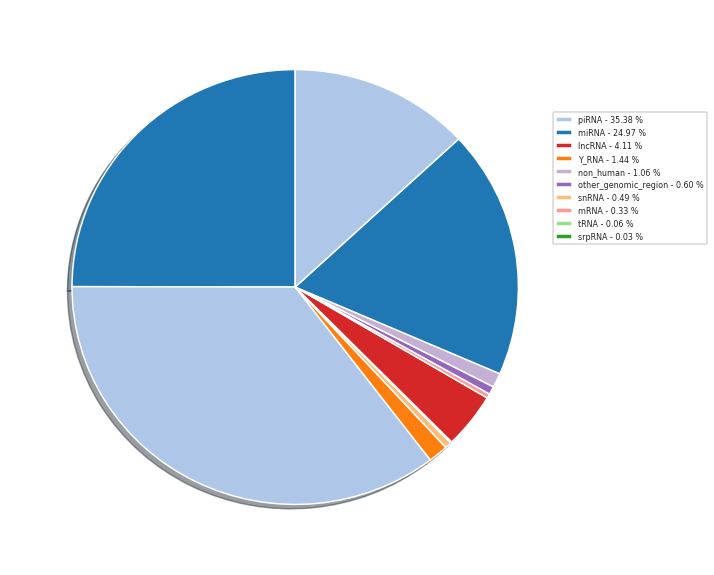

In [19]:
x = rnanames
colours = tableau20[:len(x)]/255.
y = rna_ratio.mean()
z = np.array([float('{:.4f}'.format(y[i])) for i in range(y.shape[0])])*100

fig1, ax1 = plt.subplots(figsize=(10,10))
patches, texts = ax1.pie(y,  colors=colours, #autopct='%1.1f%%',
                        shadow=True, startangle=90)

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, z)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center', bbox_to_anchor=(1.1, .7),
           fontsize=8)

In [15]:
lengthdata = pd.read_table(file2)
lengthdata.head()

,miRNA,piRNA,Y_RNA,srpRNA,snRNA,snoRNA,tRNA,lncRNA,mRNA
16,0.005497,0.006112,0.008437,0.051114,0.061868,0.042397,0.037157,0.163992,0.191897
17,0.003704,0.004776,0.008711,0.051346,0.078669,0.055470,0.023535,0.050170,0.077533
18,0.009105,0.013321,0.020494,0.063477,0.398990,0.084507,0.026284,0.156801,0.373581
19,0.046643,0.006902,0.021579,0.062132,0.054225,0.094942,0.033714,0.073325,0.141487
20,0.126306,0.007135,0.031330,0.156042,0.059134,0.166345,0.034211,0.075163,0.057111


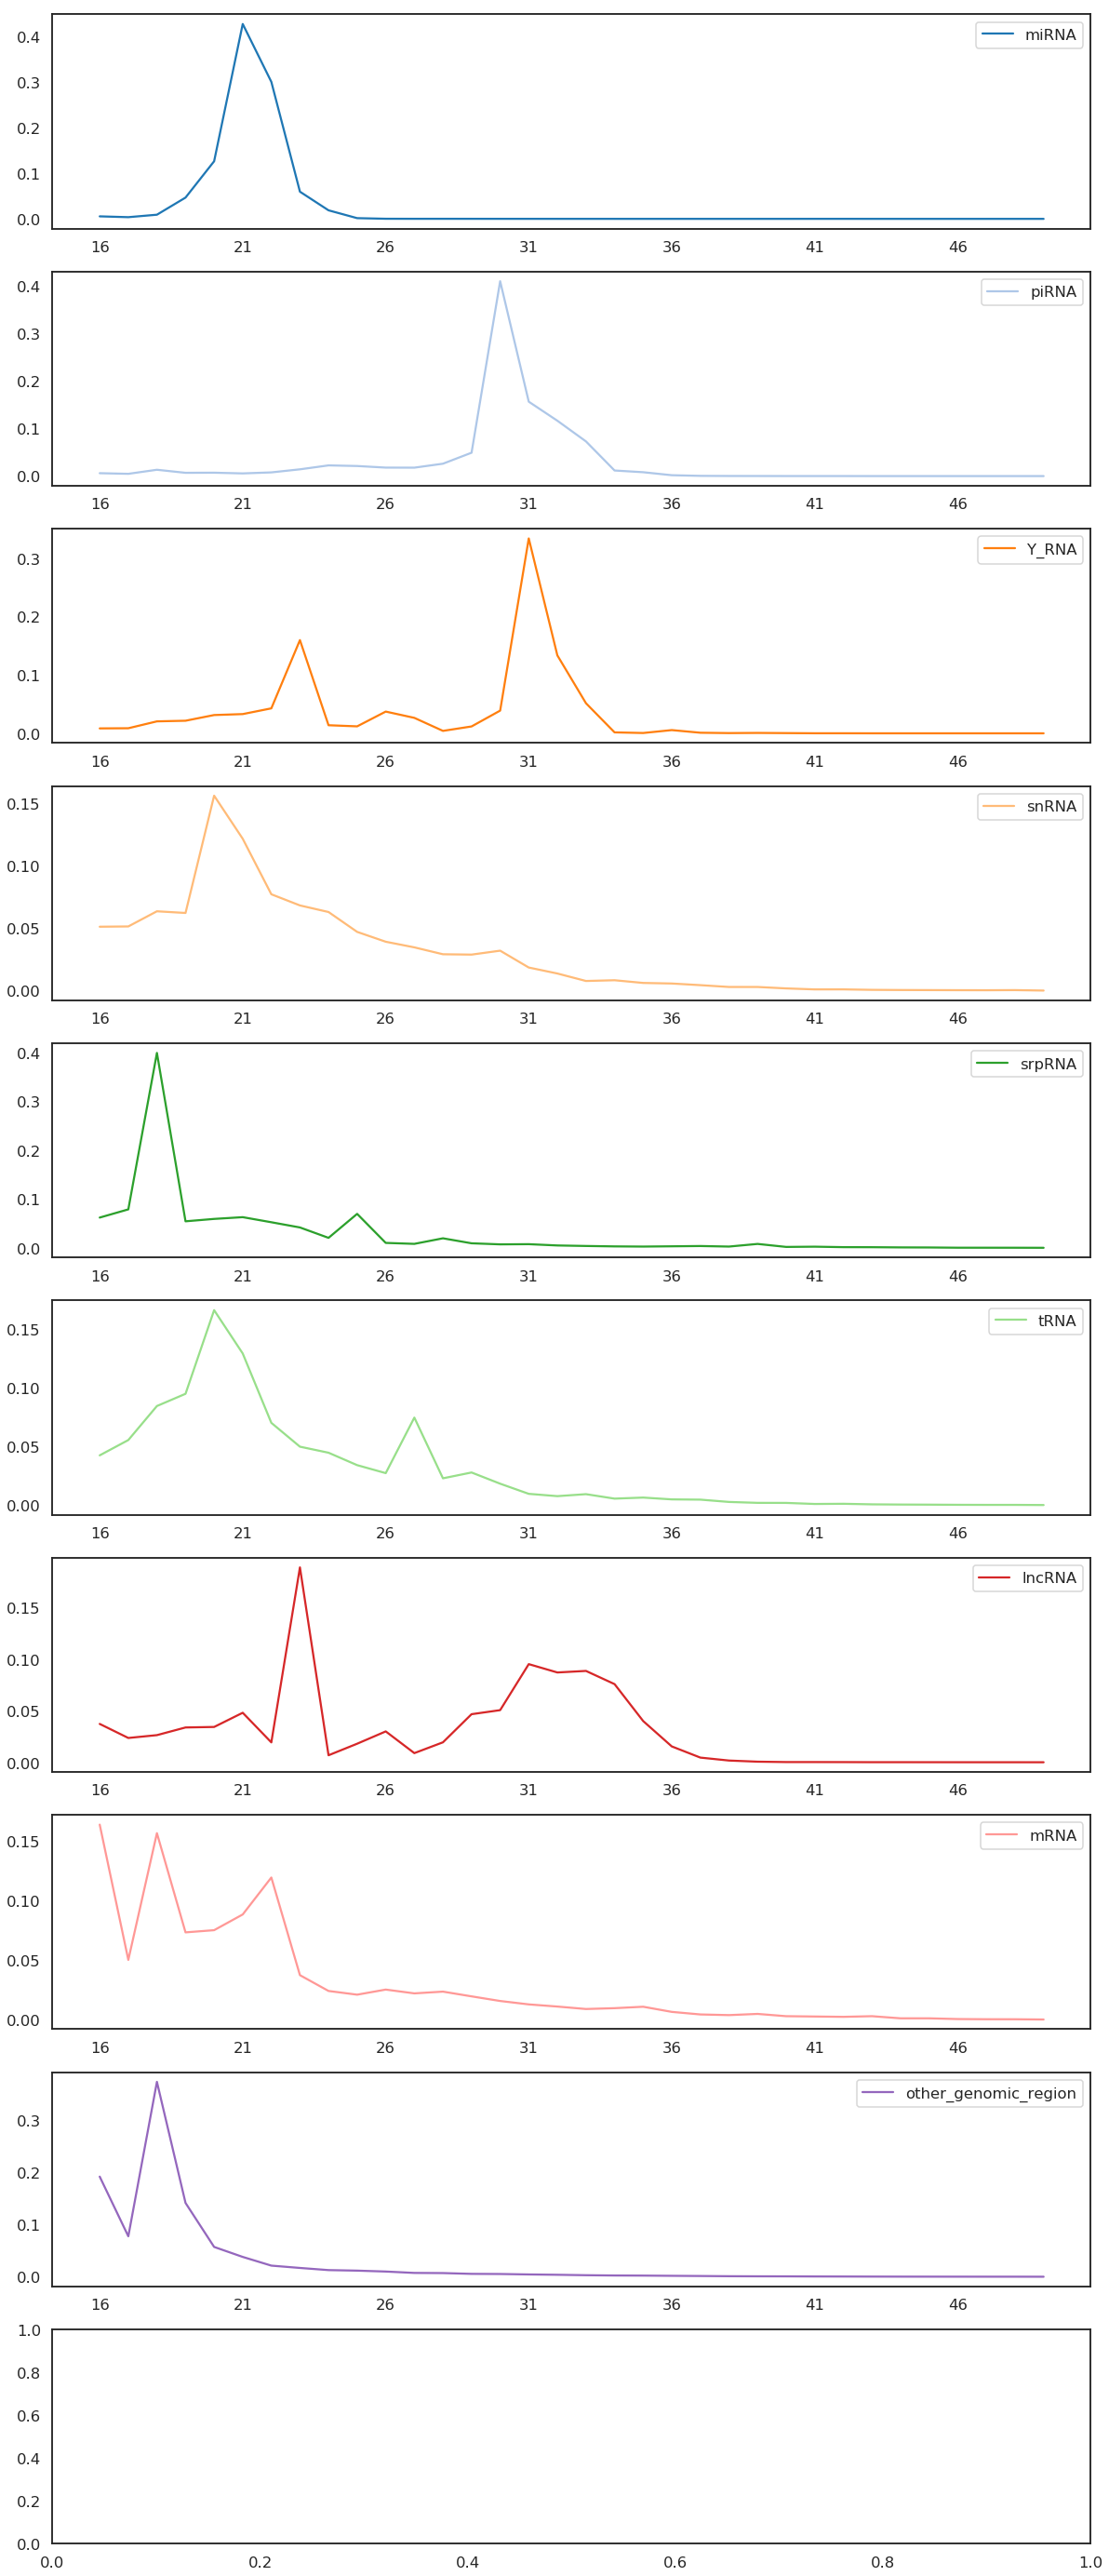

In [28]:
length = np.array(lengthdata.T)
fig,ax=plt.subplots(10,1,figsize=(20,50))
for i in range(length.shape[0]):
    ax[i].plot(length[i],label=rnanames[i],color=colours[i])
    ax[i].legend(loc='upper right')
    ax[i].set_xticklabels(np.arange(lengthdata.index[0]-5,lengthdata.index[-1],5))

[Text(0,0,'0.0%'),
 Text(0,0,'10.0%'),
 Text(0,0,'20.0%'),
 Text(0,0,'30.0%'),
 Text(0,0,'40.0%'),
 Text(0,0,'50.0%'),
 Text(0,0,'60.0%'),
 Text(0,0,'70.0%'),
 Text(0,0,'80.0%'),
 Text(0,0,'90.0%')]

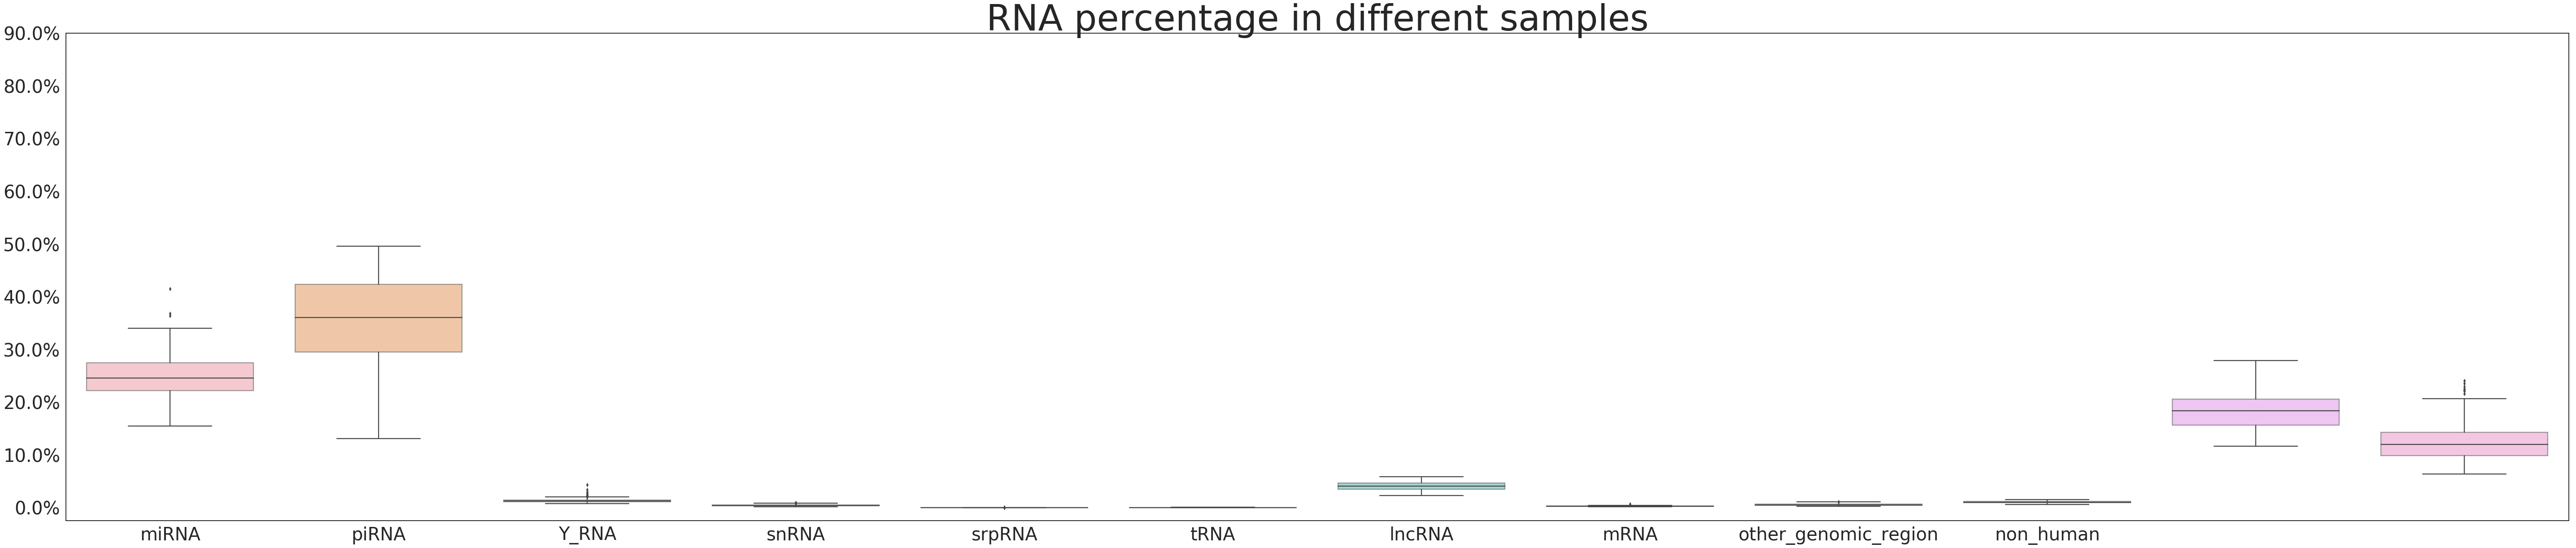

In [17]:
fig, ax = plt.subplots(figsize=(100,20))
sns.boxplot(data =  rna_ratio,ax=ax,boxprops=dict(alpha=.5))
ax.set_title(u'RNA percentage in different samples',fontsize=80)
ax.set_xticks(range(10))
ax.set_xticklabels(rnanames,fontsize=40)
ax.set_yticks(np.arange(0,1,0.1))
ax.set_yticklabels(['{:.1f}%'.format(i*10) for i in range(10)],fontsize=40)